# fast.ai Lesson 1a

## Additional Setup for Google Colab
- Per instruction at [Fast.ai Lesson 1 on Google Colab (Free GPU)](https://towardsdatascience.com/fast-ai-lesson-1-on-google-colab-free-gpu-d2af89f53604)
- also see [Fastest way to setup Fast.ai course notebooks , for free — using Google Colab and Clouderizer](https://medium.com/@prakash_31206/fastest-way-to-setup-fast-ai-course-notebooks-for-free-using-google-colab-gpu-and-clouderizer-c8a004e1d50d)
- and see [discussion](http://forums.fast.ai/t/fast-ai-with-google-colab/18882)  

We need to add this at beginning of each notebook.

In [1]:
!git clone https://github.com/rkuo/fastai.git

fatal: destination path 'fastai' already exists and is not an empty directory.


###Installing Pytorch

In [2]:
#!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl  && pip install torchvision

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


###Workaround for an issue with PIL

In [3]:
!pip install Pillow==4.1.1
!pip install PIL
!pip install image

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


###Installing fastai

In [4]:
!pip install fastai

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


###Installing libSM

The import of fastai is will throw an error that this library is missing. So, Installing the same.

In [5]:
!apt update && apt install -y libsm6 libxext6

Get:1 http://security.ubuntu.com/ubuntu artful-security InRelease [83.2 kB]
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Get:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease [74.6 kB]
Fetched 247 kB in 1s (192 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
7 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


### Miscellanious  


#### Short-Cut Keys
- use tab key for code completion, and
- shift-tab for arguement list,  ** problem** [work-around](https://github.com/googlecolab/colabtools/issues/22), use alt+/  and
- hit shift-tab twice to get document of the function, and
- hit shift-tab three time to get a separate window with document to pop-up or just type a question mark (?) in front of function, and ?? to cause the source code to display.
- use ! at beginning of cell to execute bash command.

#### Connect to local drive
There are some `code snippets` (the tablet next to `Table of Contents`) can be copied to the notebook.
- [Drive FUSE](https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q)
- [External Data](https://colab.research.google.com/notebooks/io.ipynb)
- [work with fastai](http://forums.fast.ai/t/colaboratory-and-fastai/10122/7)
- [How to Upload Your Own Dataset into Google Colab](https://mc.ai/how-to-upload-your-own-dataset-into-google-colab/) this the easist way.

### Download Dataset

In [6]:
# only need at the first time
# !mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

mkdir: cannot create directory ‘data’: File exists


In [7]:
!ls data/tableschairs

models	tmp  train  valid


In [8]:
!pwd

/content


## Image classification with Convolutional Neural Networks

Welcome to the first week of the second deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

In [0]:
import sys
import os

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from matplotlib import pyplot as plt
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

## Model

### Find out what we have

Find out whether we have GPU available. NVida's GPU library is `cuda`. 

In [13]:
torch.cuda.is_available()

False

In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return True, you may want to look into why.

In [14]:
torch.backends.cudnn.enabled

True

### First take a look of the data

In [15]:
#find out current location
!pwd

/content


In [0]:
# we know where is data
PATH = "data/tableschairs/"

In [0]:
sz=224

In [18]:
!ls {PATH}

models	tmp  train  valid


We can also get the sub-directory via os library, it returns an array.

In [19]:
subdir = os.listdir(PATH)
print(subdir)
type(subdir)

['train', 'models', 'tmp', 'valid']


list

In [20]:
os.listdir(f'{PATH}valid')

['chairs', 'tables']

In [21]:
listOfTablePics = os.listdir(f'{PATH}valid/tables')
len(listOfTablePics)

3

There is 1000 of dog pictures in the directory.

In [22]:
files = os.listdir(f'{PATH}valid/tables')[0:3]
files

['table3.jpeg', 'table1.jpeg', 'table2.jpeg']

(194, 259, 3)
(225, 225, 3)


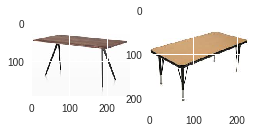

In [23]:
for i in range(0, 2): 
  plt.subplot(1, 3, i+1)
  img = plt.imread(f'{PATH}valid/tables/{files[i]}')  # this requires pyplot
  print(img.shape)
  plt.imshow(img)

Images are not the same shape.

In [24]:
# try this with "head" and "tail"
imgFiles = !ls {PATH}valid/tables | head
imgFiles

['table1.jpeg', 'table2.jpeg', 'table3.jpeg']

data/tableschairs/valid/tables/table3.jpeg


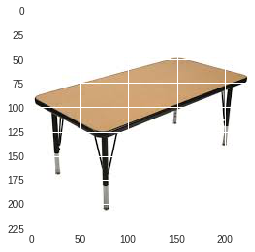

In [25]:
print(f'{PATH}valid/tables/{files[0]}')
plt.imshow(plt.imread(f'{PATH}valid/tables/{imgFiles[0]}'))

In [26]:
img.shape

(225, 225, 3)

In [27]:
img[:2,:2]

array([[[255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [0]:
# we know where is data
PATH = "data/tableschairs/"

In [0]:
sz=224

In [30]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

epoch      trn_loss   val_loss   accuracy   
    0      0.707758   0.609821   0.5       
    1      0.69127    0.364417   1.0       
    2      0.502602   0.216927   1.0       



[array([0.21693]), 1.0]